In [1]:
import plotly.graph_objects as go
import plotly.express as px
import alpaca_trade_api as api
import yaml

In [2]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

In [3]:
alpaca = api.REST(config['api-key'], config['api-secret'])

In [4]:
# Fetch tick data
aapl_trades = alpaca.get_trades('AAPL', start='2023-06-01', limit=10000).df

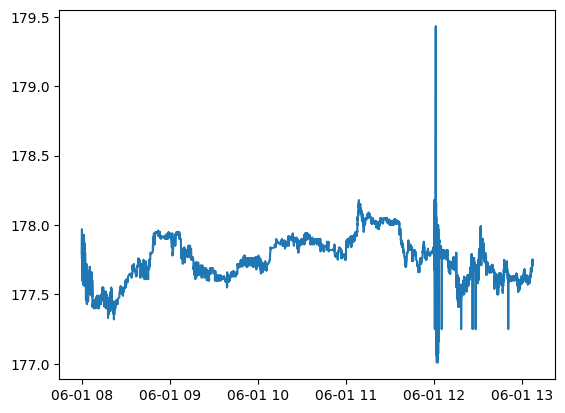

In [11]:
import matplotlib.pyplot as plt


plt.plot(aapl_trades.index, aapl_trades['price'])

# atsifiltruoti ir pavaizduoti

In [5]:
# Plot tick data
exchange_histogram = px.histogram(aapl_trades, x="exchange")
exchange_histogram.update_layout(
    title="Frequency of exchanges in the first 10,000 trades of $AAPL on January 19, 2022",
    yaxis_title="Number of trades",
    xaxis_title="Exchange")
exchange_histogram.show()

In [6]:
# Fetch minute data
aapl_minute_bars = alpaca.get_bars("AAPL", "1Min", "2023-06-01", "2023-06-01").df.between_time('12:00','12:30')

In [7]:
# Plot minute data
candlestick_fig = go.Figure(data=[go.Candlestick(
    x=aapl_minute_bars.index,
    open=aapl_minute_bars['open'],
    high=aapl_minute_bars['high'],
    low=aapl_minute_bars['low'],
    close=aapl_minute_bars['close'])])

candlestick_fig.update_layout(
    title="Candlestick chart for $AAPL",
    xaxis_title="Date",
    yaxis_title="Price ($USD)")

candlestick_fig.show()

In [8]:
# Fetch daily data
aapl_daily_bars = alpaca.get_bars("AAPL", "1Day", "2023-01-01", "2023-01-31").df

In [9]:
# Plot daily data
candlestick_fig = go.Figure(data=[go.Candlestick(
    x=aapl_daily_bars.index,
    open=aapl_daily_bars['open'],
    high=aapl_daily_bars['high'],
    low=aapl_daily_bars['low'],
    close=aapl_daily_bars['close'])])

candlestick_fig.update_layout(
    title="Candlestick chart for $AAPL",
    xaxis_title="Date",
    yaxis_title="Price ($USD)")

candlestick_fig.show()